In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu

In [2]:
from variant_tasks import *

## Nucleotide Transformer

In [3]:
model_name="nucleotide-transformer-v2-500m-multi-species"
model="Nucleotide Transformer"

In [4]:
ctrl_likelihoods, sig_likelihoods, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Eu.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_likelihoods, sig_likelihoods, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=553066981.5, pvalue=0.2921799130542889)

In [5]:
np.min(ctrl_likelihoods), np.max(ctrl_likelihoods), np.min(sig_likelihoods), np.max(sig_likelihoods)

(0.0, 338.15771484375, 0.00146484375, 159.9658203125)

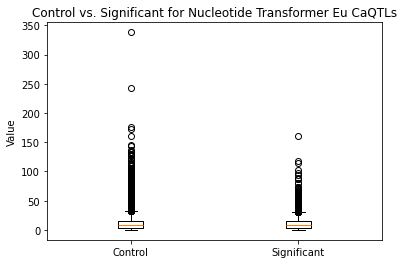

In [6]:
data = [ctrl_likelihoods, sig_likelihoods]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

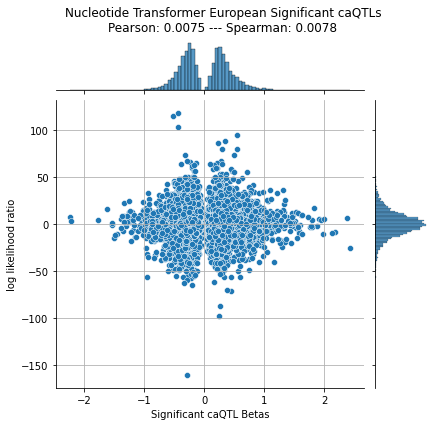

In [7]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs", "log likelihood ratio")

In [8]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(6597, 48) (101283, 48)
101283 6597


MannwhitneyuResult(statistic=331485137.5, pvalue=0.8553253736987994)

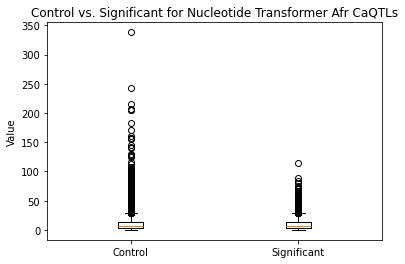

In [9]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

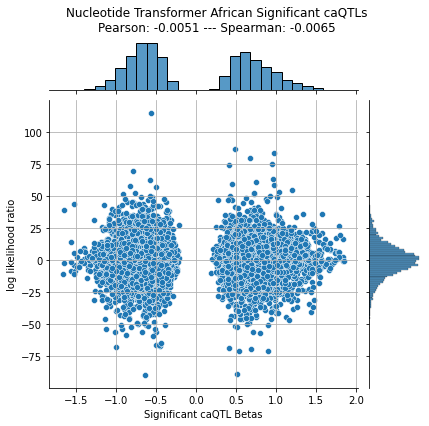

In [10]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs", "log likelihood ratio")

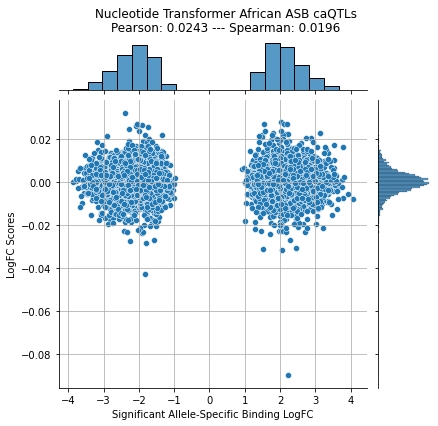

In [11]:
afr_asb = variants_Afr_ASB_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.ASB.CaQTLS.likelihoods.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

In [12]:
df = pd.read_csv(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/gm12878.dsqtls.benchmarking_likelihoods.tsv", sep="\t")
df = pd.read_csv("/oak/stanford/groups/akundaje/anusri/variant-benchmakring/gm12878.dsqtls.benchmarking.tsv", sep="\t")
df[df["var.isused"]]

,var.chrom,var.pos,var.allele1,var.allele2,var.rsid,var.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.crs,pred.chrombpnet.encsr637xsc_25m.varscore.pval,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.crs,pred.chrombpnet.encsr637xsc_5m.varscore.pval
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.021877,0.127298,0.291935,0.067401,0.004840,0.018692,0.065098,0.049902,0.001360,0.065265
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.027762,0.056287,0.093192,0.036053,0.002239,0.033704,0.045314,0.034489,0.000898,0.077782
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.029658,0.349964,-0.402188,-0.038791,0.008839,0.006710,-0.163023,-0.039080,0.002210,0.029520
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.137196,0.518532,-0.622704,-0.222396,0.086945,0.000056,-0.259064,-0.172960,0.027583,0.000195
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.053680,0.103350,-0.061906,-0.050589,0.003275,0.027075,-0.032300,-0.023135,0.000802,0.084252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,chr9,140938183,A,G,rs3750506,-1,True,NaN,0.487228,0.000005,...,0.000093,0.000505,-0.046869,-0.008768,0.000026,0.540378,-0.026908,-0.006874,0.000050,0.525221
28303,chr9,140953297,G,A,rs10780199,-1,True,NaN,2.804388,-0.000003,...,0.000028,0.000094,0.016504,0.005610,0.000002,0.876184,0.002748,0.003831,0.000002,0.930803
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.000146,0.000272,-0.017531,-0.006130,0.000007,0.744708,-0.005638,-0.005843,0.000012,0.783146
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.000122,0.000375,0.012734,0.005202,0.000001,0.890162,0.004291,0.006334,0.000001,0.939177


## DNABert2

In [13]:
model_name="DNABERT-2-117M"
model="DNABert2"

In [14]:
ctrl_likelihoods, sig_likelihoods, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Eu.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_likelihoods, sig_likelihoods, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=560697346.5, pvalue=0.002339425573824354)

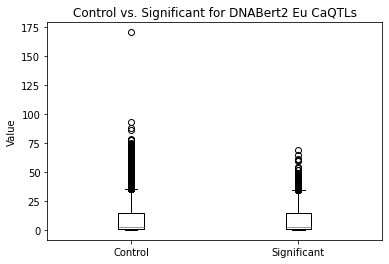

In [15]:
data = [ctrl_likelihoods, sig_likelihoods]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

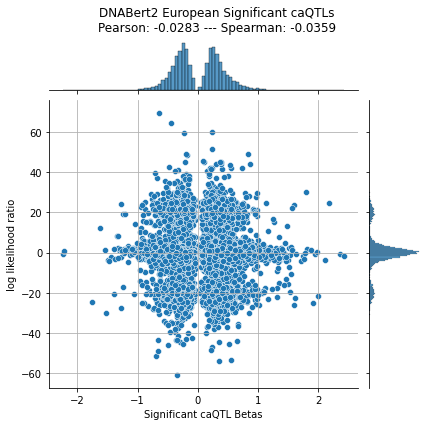

In [16]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs", "log likelihood ratio")

In [17]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(6597, 48) (101283, 48)
101283 6597


MannwhitneyuResult(statistic=337811085.5, pvalue=0.06406290093346774)

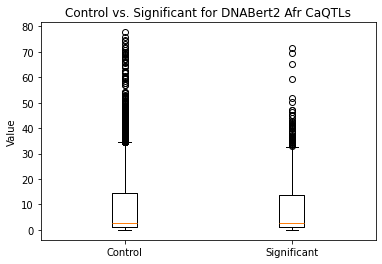

In [18]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

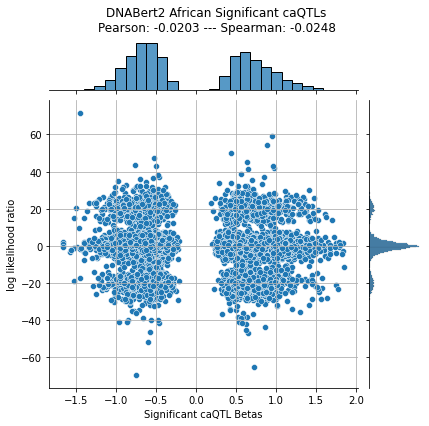

In [19]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs", "log likelihood ratio")

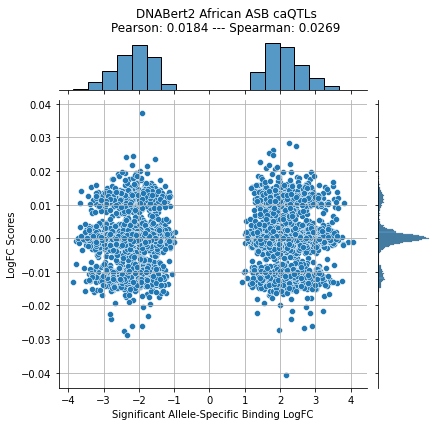

In [20]:
afr_asb = variants_Afr_ASB_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.ASB.CaQTLS.likelihoods.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

## Gena LM

In [21]:
model_name="gena-lm-bert-large-t2t"
model="Gena LM"

In [22]:
ctrl_likelihoods, sig_likelihoods, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Eu.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_likelihoods, sig_likelihoods, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=552038884.5, pvalue=0.4053017605287693)

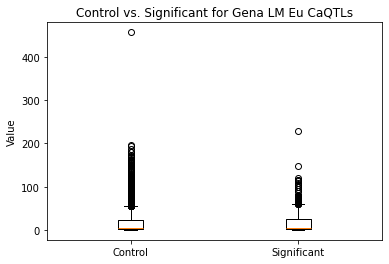

In [23]:
data = [ctrl_likelihoods, sig_likelihoods]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

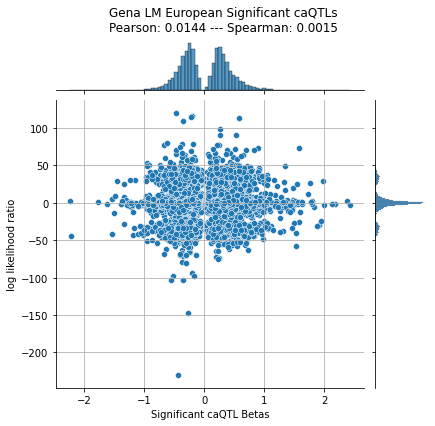

In [24]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs", "log likelihood ratio")

In [25]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(6597, 48) (101283, 48)
101283 6597


MannwhitneyuResult(statistic=336350824.0, pvalue=0.17729443935657985)

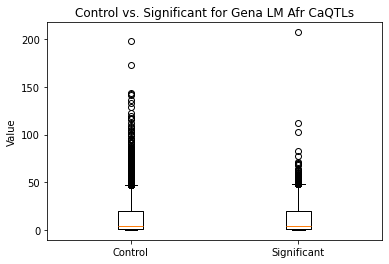

In [26]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

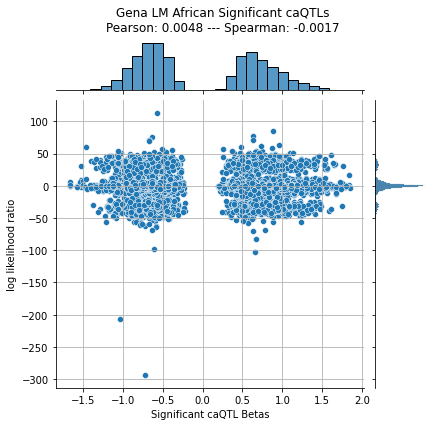

In [27]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs", "log likelihood ratio")

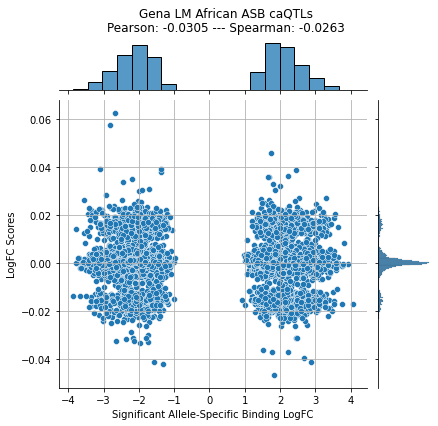

In [28]:
afr_asb = variants_Afr_ASB_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.ASB.CaQTLS.likelihoods.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

## Mistral DNA

In [29]:
model_name="Mistral-DNA-v0.1"
model="Mistral DNA"

In [30]:
ctrl_likelihoods, sig_likelihoods, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Eu.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_likelihoods, sig_likelihoods, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=558069141.0, pvalue=0.02054746174917137)

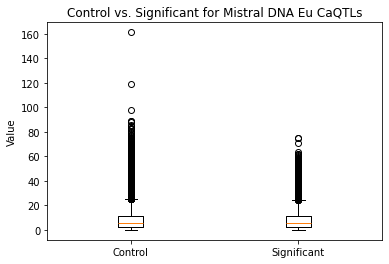

In [31]:
data = [ctrl_likelihoods, sig_likelihoods]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

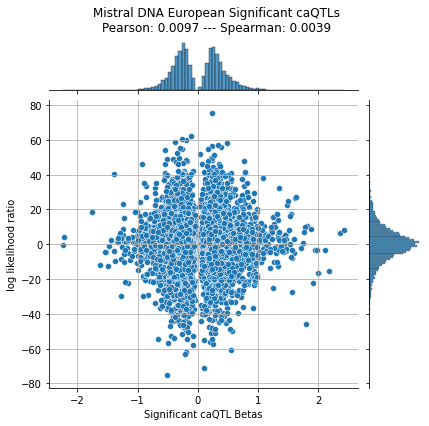

In [32]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs", "log likelihood ratio")

In [33]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(6597, 48) (101283, 48)
101283 6597


MannwhitneyuResult(statistic=340442888.5, pvalue=0.004724723005488279)

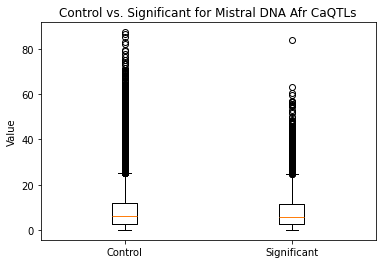

In [34]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

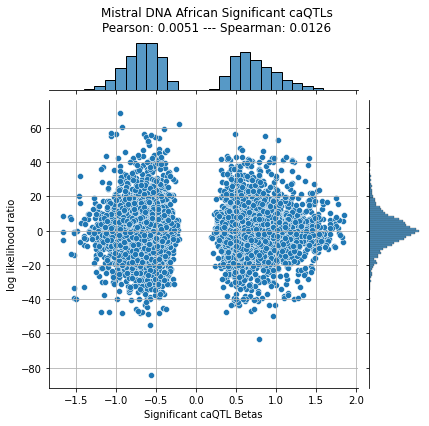

In [35]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs", "log likelihood ratio")

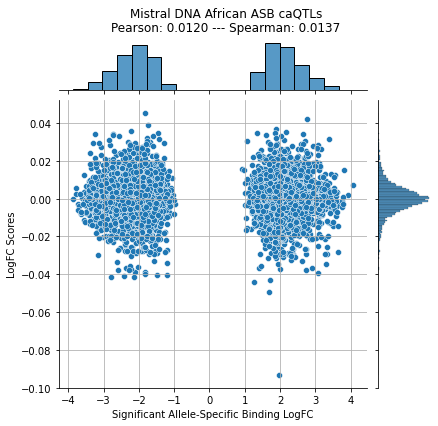

In [36]:
afr_asb = variants_Afr_ASB_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.ASB.CaQTLS.likelihoods.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

## HyenaDNA

In [37]:
model_name="hyenadna-large-1m-seqlen-hf"
model="Hyena DNA"

In [38]:
ctrl_likelihoods, sig_likelihoods, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Eu.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_likelihoods, sig_likelihoods, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=562000122.0, pvalue=0.0006457676711323131)

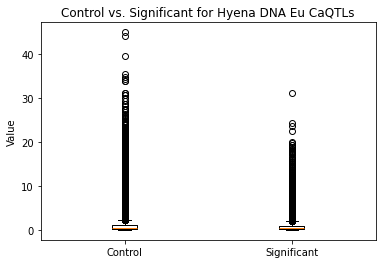

In [39]:
data = [ctrl_likelihoods, sig_likelihoods]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

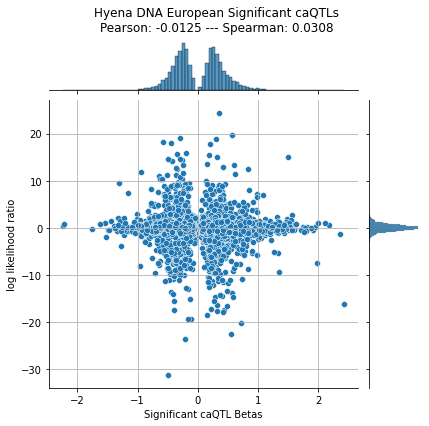

In [40]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs", "log likelihood ratio")

In [41]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.CaQTLS.likelihoods.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(6597, 48) (101283, 48)
101283 6597


MannwhitneyuResult(statistic=340811265.0, pvalue=0.0030195211839948084)

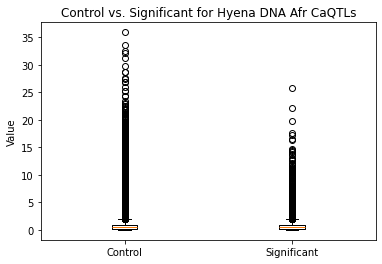

In [42]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

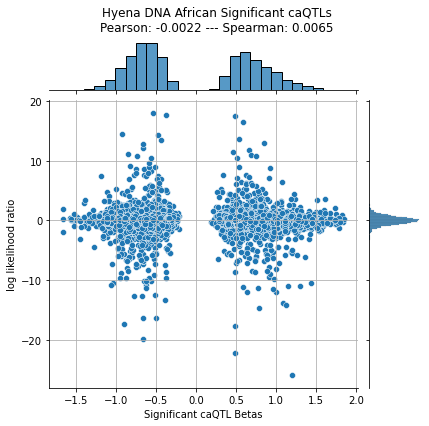

In [43]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs", "log likelihood ratio")

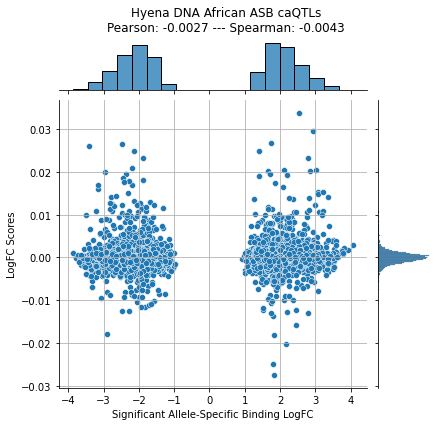

In [44]:
afr_asb = variants_Afr_ASB_CaQTLs(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/{model_name}/Afr.ASB.CaQTLS.likelihoods.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

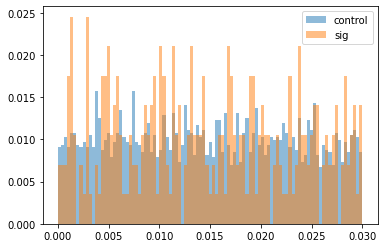

In [45]:
bins = np.linspace(0, 0.03, 100)  # Define the bins to cover the range of both datasets

counts_ctrl, bins_ctrl = np.histogram(ctrl_likelihoods, bins=bins)
fractions_ctrol = counts_ctrl / counts_ctrl.sum()
plt.hist(bins_ctrl[:-1], bins_ctrl, weights=fractions_ctrol, alpha=0.5, label="control")
counts_sig, bins_sig = np.histogram(sig_likelihoods, bins=bins)
fractions_sig = counts_sig / counts_sig.sum()
plt.hist(bins_sig[:-1], bins_sig, weights=fractions_sig, alpha=0.5, label="sig")
plt.legend()

In [46]:
paths = glob.glob("/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/hyenadna-large-1m-seqlen-hf/*")

In [47]:
likelihood = pd.read_csv("/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/likelihoods/DNABERT-2-117M/Eu.CaQTLS.likelihoods.tsv", sep="\t")
data = pd.read_csv("/oak/stanford/groups/akundaje/anusri/variant-benchmakring/Eu.CaQTLS.tsv", sep="\t")

In [48]:
likelihoods_data = pd.concat([data, likelihood], axis=1)

In [49]:
data.shape[0]

226346

In [50]:
likelihood

,allele1_likelihoods,allele2_likelihoods
0,-1885.444824,-1886.795776
1,-1842.158203,-1831.430908
2,-1735.164307,-1733.360474
3,-1738.009766,-1737.827148
4,-2038.798462,-2036.318115
...,...,...
226341,-1976.257935,-1985.855469
226342,-1675.406128,-1658.972656
226343,-2007.959717,-2028.715820
226344,-2387.890625,-2336.623291


In [51]:
threshold = np.arange(3,23,2)[0]
threshold = 3
filtered_var_eucaqtls = likelihoods_data[(likelihoods_data["Inside_Peak"]==True) &
                                          (likelihoods_data["IsUsed"]==True)].copy(deep=True)
    
filtered_var_eucaqtls_df_sig = filtered_var_eucaqtls[filtered_var_eucaqtls["Log10_BF"]>threshold].copy(deep=True)
filtered_var_eucaqtls_df_ctrl = filtered_var_eucaqtls[filtered_var_eucaqtls["Log10_BF"]<-1].copy(deep=True)

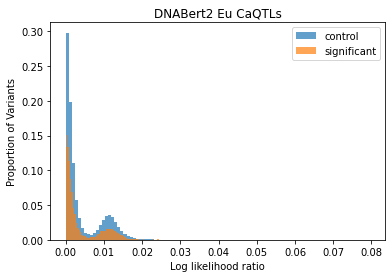

In [52]:
data1 = np.abs(np.log(filtered_var_eucaqtls_df_ctrl["allele1_likelihoods"]/filtered_var_eucaqtls_df_ctrl["allele2_likelihoods"]))

counts1, bins1 = np.histogram(data1, bins=100)
fractions1 = counts1 / counts1.sum()
plt.hist(bins1[:-1], bins1, weights=fractions1, alpha=0.7, label="control")

data2 = np.abs(np.log(filtered_var_eucaqtls_df_sig["allele1_likelihoods"]/filtered_var_eucaqtls_df_sig["allele2_likelihoods"]))
counts2, bins2 = np.histogram(data2, bins=100)
fractions2 = counts2 / counts2.sum()

plt.hist(bins2[:-1], bins2, weights=fractions2, alpha=0.7, label="significant")
plt.xlabel("Log likelihood ratio")
plt.ylabel("Proportion of Variants")
plt.title("DNABert2 Eu CaQTLs")
# plt.xlim([-0.0001,0.01])
plt.legend()
plt.show()

In [53]:
fractions1.sum(), fractions2.sum()

(1.0, 0.9999999999999999)

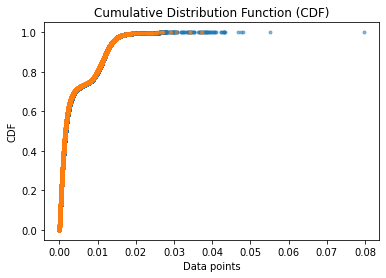

In [54]:
data_sorted1 = np.sort(data1)  
cdf1 = np.arange(1, len(data1) + 1) / len(data1)  
plt.plot(data_sorted1, cdf1, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')

data_sorted2 = np.sort(data2)  
cdf2 = np.arange(1, len(data2) + 1) / len(data2)  
plt.plot(data_sorted2, cdf2, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

Text(0.5, 1.0, 'Control vs. Significant for DNABert2 Eu CaQTLs')

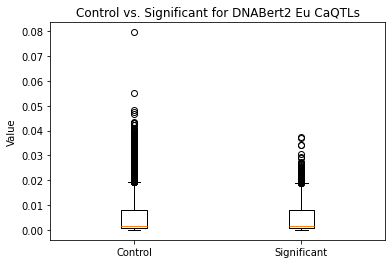

In [55]:
data = [data1, data2]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant'])  # Set custom labels for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.title('Control vs. Significant for DNABert2 Eu CaQTLs')  # Title of the plot